Lese inn alle observasjonene fra StationM

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import datetime
import glob


In [54]:
# Lese inn tekstfilene for deployment 2 (d2) ved 500, 800, 1000, 1200 m:
txtfile_d2_500m  = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_500m.txt'
txtfile_d2_800m  = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_800m.txt'
txtfile_d2_1000m = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_1000m.txt'
txtfile_d2_1200m = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_1200m.txt'
txtfile_d2_2000m = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_2000m.txt'


In [55]:
# Lese inn tekstfilene for deployment 3 (d3) ved 500, 800, 1000, 1200 m:
txtfile_d3_500m  = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment3/StaM_SBE_20221125_500m.txt'
txtfile_d3_800m  = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment3/StaM_SBE_20221125_800m.txt'
txtfile_d3_1000m = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment3/StaM_SBE_20221125_1000m.txt'
txtfile_d3_1200m = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment3/StaM_SBE_20221125_1200m.txt'
txtfile_d3_2000m = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment3/StaM_SBE_20221125_2000m.txt'


In [56]:
# Oppggir kolonnene som skal brukes:
names = ['T_raw_degC', 'T_raw_qf', 'T_degC', 'T_qf', 'C_raw_S/m', 
         'C_raw_qf',  'C_S/m', 'C_qf', 'p_raw_dbar', 'p_raw_qf', 
         'p_dbar', 'p_qf', 'S_raw', 'S_raw_q', 'S', 'S_qf', 
         'day', 'month', 'year', 'time']

In [57]:
# For å sette alle månedsnavnene til å være på engelsk må vi bytte ut de norske forkortelsene:
parse = lambda x: datetime.datetime.strptime(x.replace('Des', 'Dec').replace('Mai', 'May').replace('Okt', 'Oct'), '%d %b %Y %H:%M:%S')
 
# Leser inn txt filene fra tidligere om til et pandas datasett: 
# Navnforklaring eksempel: df - datafil, d2 - deployment 2, 500m - hvilket dyp datasettet er satt på mooringen
# Deployment 2:
df_d2_500m  = pd.read_csv(txtfile_d2_500m,  names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)
df_d2_800m  = pd.read_csv(txtfile_d2_800m,  names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)
df_d2_1000m = pd.read_csv(txtfile_d2_1000m, names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)
df_d2_1200m = pd.read_csv(txtfile_d2_1200m, names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)
df_d2_2000m = pd.read_csv(txtfile_d2_2000m, names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)

# Deployment 3:
df_d3_500m  = pd.read_csv(txtfile_d3_500m,  names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)
df_d3_800m  = pd.read_csv(txtfile_d3_800m,  names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)
df_d3_1000m = pd.read_csv(txtfile_d3_1000m, names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)
df_d3_1200m = pd.read_csv(txtfile_d3_1200m, names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)
df_d3_2000m = pd.read_csv(txtfile_d3_2000m, names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)


In [58]:
# Vil samle sammen dataen fra hver av deploymentsene basert på dybde
# Lager en funksjon som konsentrer de sammen:
def combine_dataframe_by_depth(datafile_list):
    combinde_df = pd.concat(datafile_list)
    return combinde_df

In [59]:
# Setter de sammen etter hvilket dyp de er på:
combined_500m  = combine_dataframe_by_depth([df_d2_500m,  df_d3_500m])
combined_800m  = combine_dataframe_by_depth([df_d2_800m,  df_d3_800m])
combined_1000m = combine_dataframe_by_depth([df_d2_1000m, df_d3_1000m])
combined_1200m = combine_dataframe_by_depth([df_d2_1200m, df_d3_1200m])
combined_2000m = combine_dataframe_by_depth([df_d2_2000m, df_d3_2000m])


In [60]:
# Lager et dictionary for en samla fil:
combined_data = {
    "500m": combined_500m,
    "800m": combined_800m,
    "1000m": combined_1000m,
    "1200m": combined_1200m,
    "2000m": combined_2000m
}

In [61]:
## For å se over dataen:

for depth, df in combined_data.items():
    print(f"Data for {depth}:")
    print(df.head())


Data for 500m:
             Datetime  T_raw_degC  T_raw_qf  T_degC  T_qf  C_raw_S/m  \
0 2021-11-27 13:00:24      0.0408         0  0.0408     1    2.92252   
1 2021-11-27 14:00:24      0.0435         0  0.0435     1    2.92277   
2 2021-11-27 15:00:24      0.1154         0  0.1154     1    2.92886   
3 2021-11-27 16:00:24      0.0889         0  0.0889     1    2.92677   
4 2021-11-27 17:00:24      0.1073         0  0.1073     1    2.92841   

   C_raw_qf    C_S/m  C_qf  p_raw_dbar  p_raw_qf   p_dbar  p_qf    S_raw  \
0         0  2.92252     1     515.427         0  515.427     1  34.8907   
1         0  2.92277     1     516.771         0  516.771     1  34.8901   
2         0  2.92886     1     517.629         0  517.629     1  34.8885   
3         0  2.92677     1     518.719         0  518.719     1  34.8903   
4         0  2.92841     1     518.687         0  518.687     1  34.8911   

   S_raw_q          S  S_qf  
0        0  34.901804     1  
1        0  34.901204     1  
2    

In [62]:
#Jeg ønsker å filtrere slik at jeg har kvalitetsikret data:

In [63]:
# Lager en funksjon som tar den kolonnen med data jeg ønsker å kvalitetsjekke (f.eks temperatur) og finner hvilke
# verdier som har god nok kvalitet til å brukes. I "kvalitet-kolonnene" har målingnee fått en verdi mellom 1-4,
# hvor "1 - good data", 2 - p"robably good data", 3 - "potentially correctable bad data", og 4 - "bad data".

def filter_data(datafile, colomn, quality_coloumn):
    quality_data = datafile[datafile[quality_coloumn]<3][colomn]    
    return quality_data

In [64]:
# Filtrerer data:
# - for temperatur:

temp_500m  = filter_data(combined_data["500m"], 'T_degC', 'T_qf')
temp_800m  = filter_data(combined_data["800m"], 'T_degC', 'T_qf')
temp_1000m = filter_data(combined_data["1000m"], 'T_degC', 'T_qf')
temp_1200m = filter_data(combined_data["1200m"], 'T_degC', 'T_qf')
temp_2000m = filter_data(combined_data["2000m"], 'T_degC', 'T_qf')

# - for salinitet:
sal_500m = filter_data(combined_data["500m"], "S", "S_qf")
sal_800m = filter_data(combined_data["800m"], "S", "S_qf")
sal_1000m = filter_data(combined_data["1000m"], "S", "S_qf")
sal_1200m = filter_data(combined_data["1200m"], "S", "S_qf")
sal_2000m = filter_data(combined_data["2000m"], "S", "S_qf")

# - for trykkmålinger:
p_500m = filter_data(combined_data["500m"], "p_dbar", "p_qf")
p_800m = filter_data(combined_data["800m"], "p_dbar", "p_qf")
p_1000m = filter_data(combined_data["1000m"], "p_dbar", "p_qf")
p_1200m = filter_data(combined_data["1200m"], "p_dbar", "p_qf")
p_2000m = filter_data(combined_data["2000m"], "p_dbar", "p_qf")

In [65]:
temp_500m

0       0.0408
1       0.0435
2       0.1154
3       0.0889
4       0.1073
         ...  
6037    2.4692
6038    2.4041
6039    2.4250
6040    2.5274
6041    2.4761
Name: T_degC, Length: 11986, dtype: float64

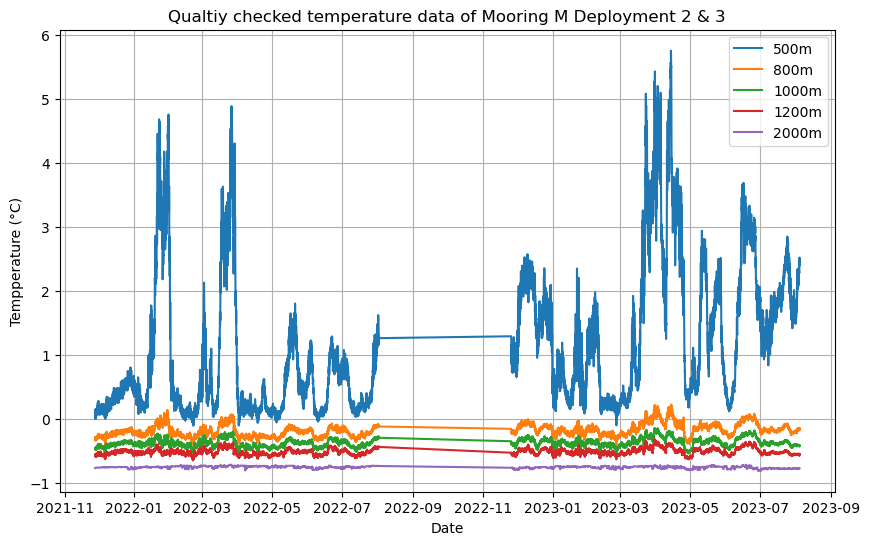

In [66]:
# Plotting av temperaturendring med dypet
plt.figure(figsize=(10, 6))
plt.plot(combined_data["500m"]['Datetime'], temp_500m.values, label='500m')
plt.plot(combined_data["500m"]['Datetime'], temp_800m.values, label='800m')
plt.plot(combined_data["500m"]['Datetime'], temp_1000m.values, label='1000m')
plt.plot(combined_data["500m"]['Datetime'], temp_1200m.values, label='1200m')
plt.plot(combined_data["500m"]['Datetime'], temp_2000m.values, label='2000m')
plt.xlabel('Date')
plt.ylabel('Tempperature (°C)')
plt.title('Qualtiy checked temperature data of Mooring M Deployment 2 & 3')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Funksjon for å lage plott av temperatur over tid for hvert dyp
def plot_temperature_over_time(combined_data):
    plt.figure(figsize=(15, 10))

    for depth, df in combined_data.items():
        plt.plot(df['Datetime'], df['T_degC'], label=f'{depth}')

    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature over Time at Different Depths')
    plt.legend()
    plt.grid(True)
    plt.show()


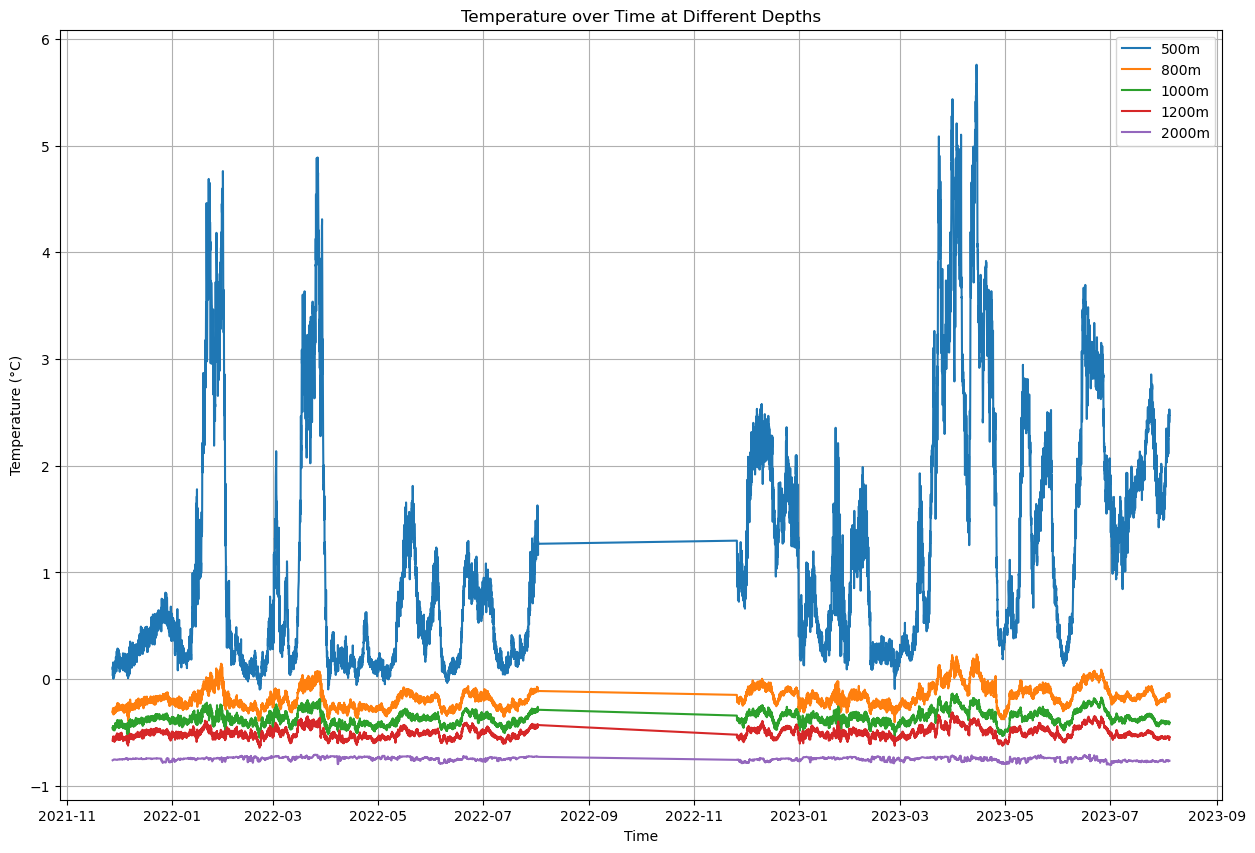

In [68]:
plot_temperature_over_time(combined_data)


In [69]:
def plot_salinity_over_time(combined_data):
    plt.figure(figsize=(15, 10))

    for depth, df in combined_data.items():
        plt.plot(df['Datetime'], df['S'], label=f'{depth}')

    plt.xlabel('Time')
    plt.ylabel('Salinity')
    plt.title('Salinity over Time at Different Depths')
    plt.legend()
    plt.grid(True)
    plt.show()

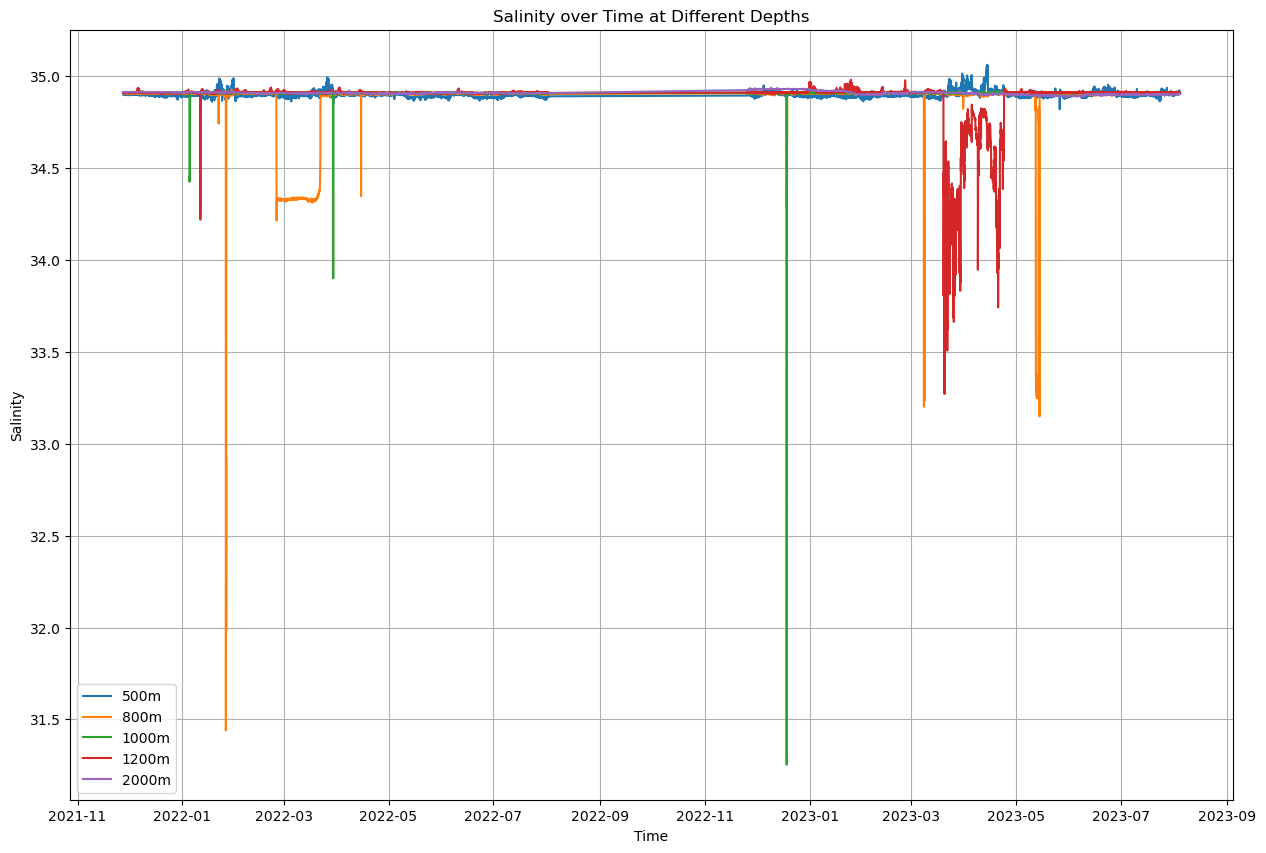

In [70]:
plot_salinity_over_time(combined_data)


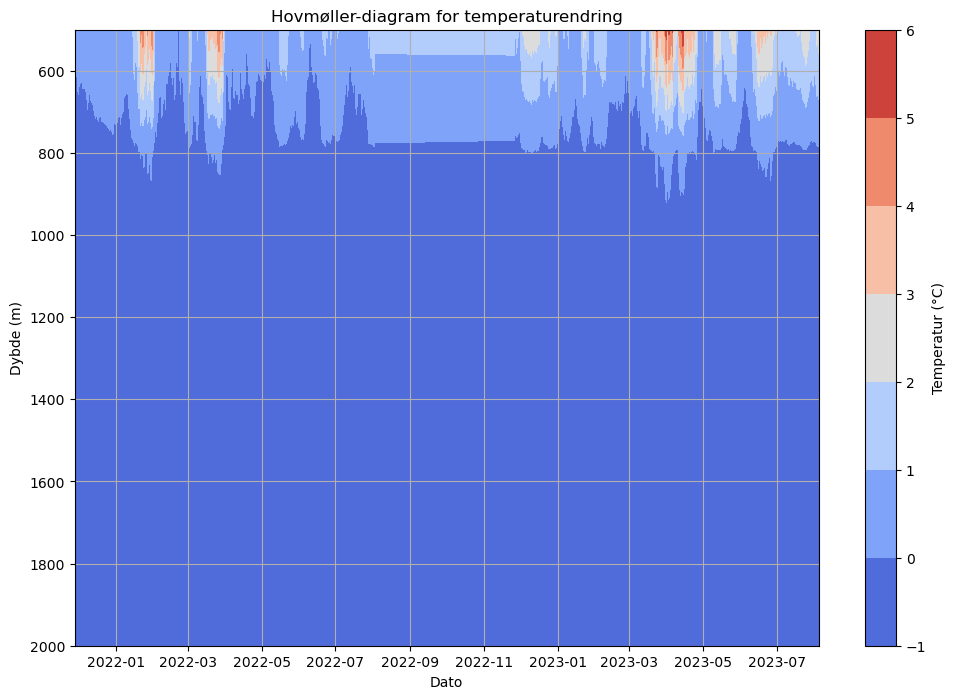

In [71]:
# P
depth = np.array([500, 800, 1000, 1200, 2000])
time = combined_data["500m"]['Datetime']


temperature_data = {
    500: temp_500m.values,   # Bruk temp_500m.values fra combined_data
    800: temp_800m.values,   # Bruk temp_800m.values fra combined_data
    1000: temp_1000m.values, # Bruk temp_1000m.values fra combined_data
    1200: temp_1200m.values, # Bruk temp_1200m.values fra combined_data
    2000: temp_2000m.values  # Bruk temp_2000m.values fra combined_data
}


X, Y = np.meshgrid(time,depth)
# Lager en temperatur-matrise for hver dybde. 
temperature_matrix = np.array([temperature_data[d] for d in depth])

plt.figure(figsize=(12, 8))
plt.contourf(X, Y, temperature_matrix, cmap='coolwarm')
plt.colorbar(label='Temperatur (°C)')
plt.xlabel('Dato')
plt.ylabel('Dybde (m)')
plt.title('Hovmøller-diagram for temperaturendring')
plt.gca().invert_yaxis()  # Inverter y-aksen for å vise dybde fra 500m til 2000m
plt.grid(True)


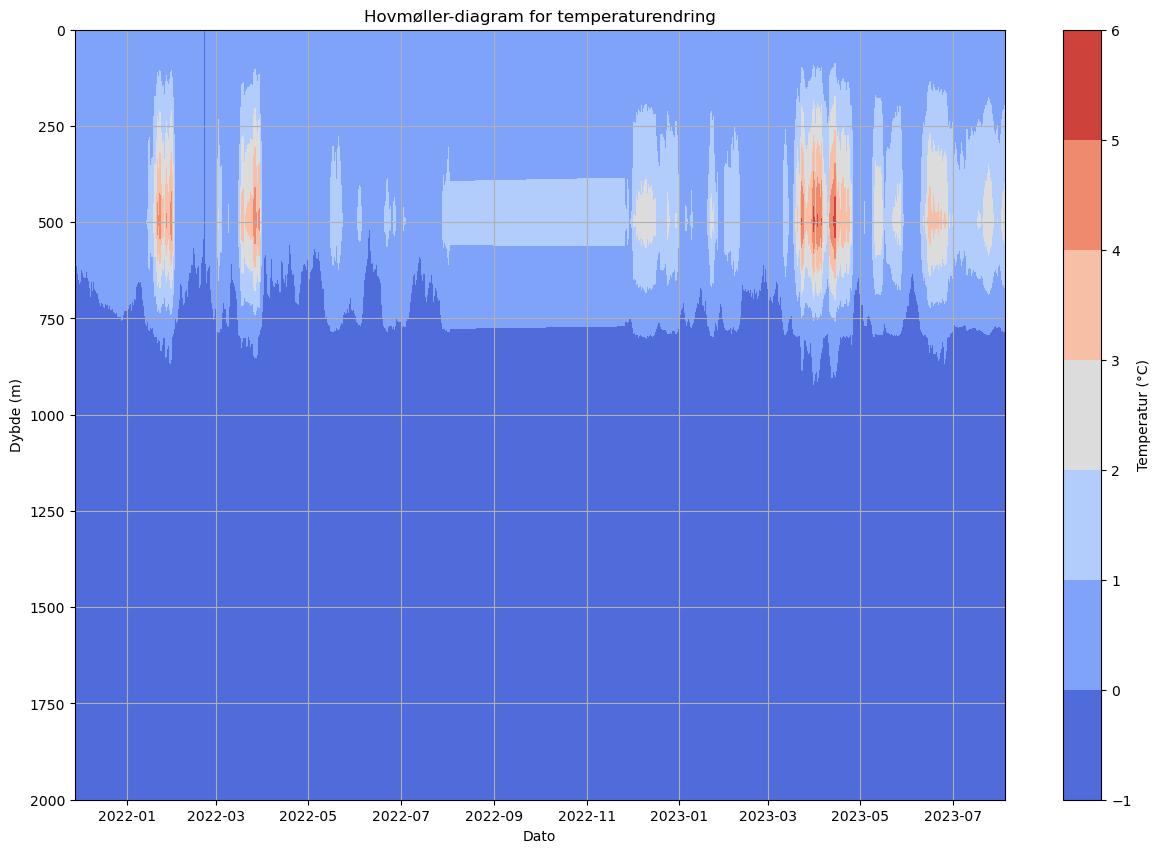

In [72]:
depth = np.array([0, 500, 800, 1000, 1200, 2000])
time = combined_data["500m"]['Datetime']


temperature_data = {
    500: temp_500m.values,   # Bruk temp_500m.values fra combined_data
    800: temp_800m.values,   # Bruk temp_800m.values fra combined_data
    1000: temp_1000m.values, # Bruk temp_1000m.values fra combined_data
    1200: temp_1200m.values, # Bruk temp_1200m.values fra combined_data
    2000: temp_2000m.values  # Bruk temp_2000m.values fra combined_data
}

# Lager en meshgrid for tid og dybde
X, Y = np.meshgrid(time,depth)
# Lager en temperatur-matrise for hver dybde. 

temperature_matrix = np.zeros((len(depth), len(time)))  # Initialiser med nuller
for idx, depth in enumerate(depth[1:]):  # Start fra 500m og fyll inn faktiske data
    temperature_matrix[idx + 1] = temperature_data[depth]


plt.figure(figsize=(15, 10))
plt.contourf(X, Y, temperature_matrix, cmap='coolwarm')
plt.colorbar(label='Temperatur (°C)')
plt.xlabel('Dato')
plt.ylabel('Dybde (m)')
plt.title('Hovmøller-diagram for temperaturendring')
plt.gca().invert_yaxis()  # Inverter y-aksen for å vise dybde fra 500m til 2000m
plt.grid(True)


In [73]:
# P
depth = np.array([500, 800, 1000, 1200, 2000])
time = combined_data["500m"]['Datetime']


sal_data = {
    500: sal_500m.values,   
    800: sal_800m.values,  
    1000: sal_1000m.values,
    1200: sal_1200m.values, 
    2000: sal_2000m.values  
}


X, Y = np.meshgrid(time,depth)
# Lager en temperatur-matrise for hver dybde. 
sal_matrix = np.array([sal_data[d] for d in depth])



/tmp/ipykernel_2071563/3242709086.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sal_matrix = np.array([sal_data[d] for d in depth])


ValueError: setting an array element with a sequence.

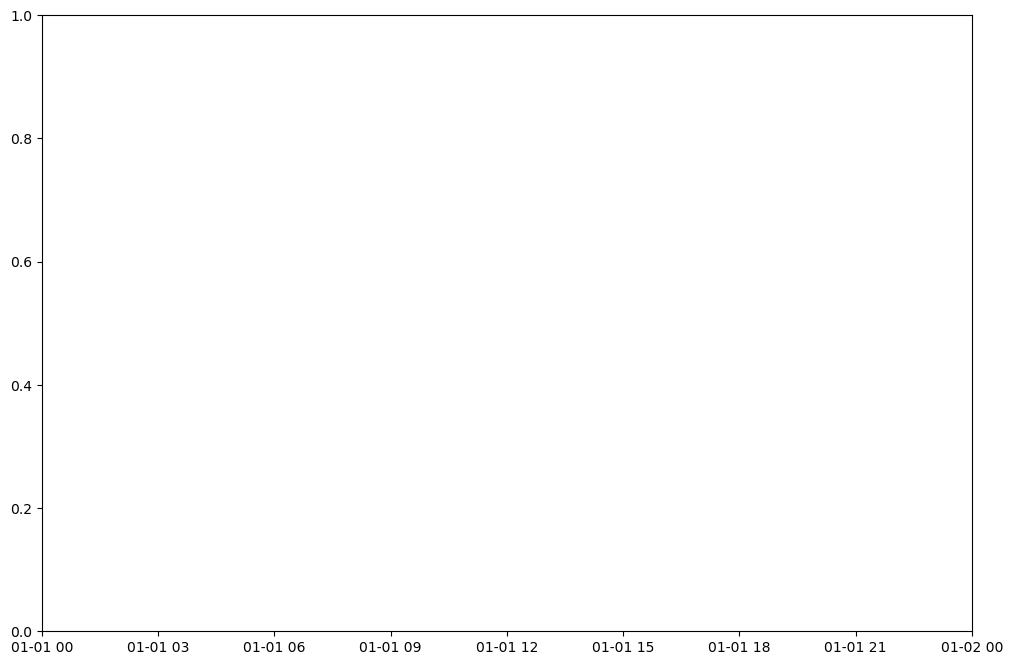

In [74]:
plt.figure(figsize=(12, 8))
plt.contourf(X, Y, sal_matrix, cmap='plasma')

In [ ]:
plt.figure(figsize=(12, 8))
plt.contourf(X, Y, sal_matrix, cmap='plasma')
plt.colorbar(label='Temperatur (°C)')
plt.xlabel('Dato')
plt.ylabel('Dybde (m)')
plt.title('Hovmøller-diagram for temperaturendring')
plt.gca().invert_yaxis()  # Inverter y-aksen for å vise dybde fra 500m til 2000m
plt.grid(True)

NameError: name 'X' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
print(temp_500m.values.shape)
print(sal_500m.values.shape)

NameError: name 'temp_500m' is not defined

In [ ]:
# P
depth = np.array([500, 800, 1000, 1200, 2000])
time = combined_data["500m"]['Datetime']


temperature_data = {
    500: temp_500m.values,   # Bruk temp_500m.values fra combined_data
    800: temp_800m.values,   # Bruk temp_800m.values fra combined_data
    1000: temp_1000m.values, # Bruk temp_1000m.values fra combined_data
    1200: temp_1200m.values, # Bruk temp_1200m.values fra combined_data
    2000: temp_2000m.values  # Bruk temp_2000m.values fra combined_data
}


X, Y = np.meshgrid(time,depth)
# Lager en temperatur-matrise for hver dybde. 
temperature_matrix = np.array([temperature_data[d] for d in depth])

plt.figure(figsize=(12, 8))
plt.contourf(X, Y, temperature_matrix, cmap='coolwarm')
plt.colorbar(label='Temperatur (°C)')
plt.xlabel('Dato')
plt.ylabel('Dybde (m)')
plt.title('Hovmøller-diagram for temperaturendring')
plt.gca().invert_yaxis()  # Inverter y-aksen for å vise dybde fra 500m til 2000m
plt.grid(True)

NameError: name 'temp_500m' is not defined